<a href="https://colab.research.google.com/github/techthumb1/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jason_Robinson_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-19 23:08:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-19 23:08:09 (280 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
headers = ['Class Name', 'Handicapped Infants', 'Water Project Cost Sharing', 
                          'Adoption of the Budget Resolution', 'Physician Fee Freeze', 
                          'El Salvador Aid', 'Religious Groups in Schools', 
                          'Canti Satellite Test Ban', 'Aid to Nicaraguan Contras',
                          'Mx Missile', 'Immigration', 'Synfuels Corporation Cutback',
                          'Education Spending', 'Superfund Right to Sue', 'Crime', 
                          'Duty Free Exports', 'Export Administration Act South Africa']


data = pd.read_csv('house-votes-84.data', names=headers, header=None, na_values='?')
data.sample(5)

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Canti Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
286,democrat,n,n,y,n,n,y,NaN,y,NaN,y,y,y,n,y,y,NaN
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
197,republican,n,NaN,y,y,y,y,n,n,n,y,n,n,n,y,n,y
258,democrat,n,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
350,democrat,n,y,n,n,n,y,y,n,y,n,y,n,n,n,y,y


In [0]:
data = data.replace({'y': 1, 'n': 0})
data.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Canti Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
data.isnull().sum()

Class Name                                  0
Handicapped Infants                        12
Water Project Cost Sharing                 48
Adoption of the Budget Resolution          11
Physician Fee Freeze                       11
El Salvador Aid                            15
Religious Groups in Schools                11
Canti Satellite Test Ban                   14
Aid to Nicaraguan Contras                  15
Mx Missile                                 22
Immigration                                 7
Synfuels Corporation Cutback               21
Education Spending                         31
Superfund Right to Sue                     25
Crime                                      17
Duty Free Exports                          28
Export Administration Act South Africa    104
dtype: int64

In [0]:
data['Adoption of the Budget Resolution'].value_counts()

1.0    253
0.0    171
Name: Adoption of the Budget Resolution, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
rep = data[data['Class Name']=='republican']
rep.head(2)

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Canti Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [0]:
dem = data[data['Class Name']=='democrat']
dem.sample(2)

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Canti Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
237,democrat,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
139,democrat,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
dem['Adoption of the Budget Resolution'].sum()/len(dem) 

0.8651685393258427

In [0]:
dem['Adoption of the Budget Resolution'].isnull().sum()
dem['Adoption of the Budget Resolution']

2      1.0
3      1.0
4      1.0
5      1.0
6      0.0
      ... 
425    1.0
426    1.0
428    NaN
429    1.0
431    1.0
Name: Adoption of the Budget Resolution, Length: 267, dtype: float64

In [0]:
dem['Adoption of the Budget Resolution'].mean()

0.8884615384615384

In [0]:
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [0]:
def confidence_interval(dem1, confidence=0.95):
    dem1 = np.array(dem1)
    mean = np.mean(dem1)
    n = len(dem1)
    stderr = np.std(dem1, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) 
    return (mean, mean - moe, mean + moe)

In [0]:
confidence_level = .95
dof = 89-1
stats.t.ppf((1 + confidence_level) / 2, dof)

1.9872898646909385

In [0]:
data1 = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(data1) 

(0.468, 0.4241134732126494, 0.5118865267873506)

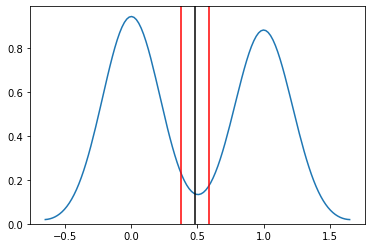

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

budget_res = np.random.binomial(n=1, p=.50, size=89)
sns.kdeplot(budget_res)

CI = confidence_interval(budget_res)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)